# ECE C247 - Neural Networks & Deep Learning
# EEG Dataset

# Group Members
### Anirudh Krishna 
### Swagath Babu 
### Jacob Thomas

# Load the Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from models import *
from solver import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Defining the Parameters

In [3]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

### We tried different values for the Learning Rate and for the Decay. However, the values defined below are considered the best in order to obtain good performance. 

## Load Data

In [4]:
data_path = "/content/drive/My Drive/Dataset/C247/"

# load data files
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=[7], verbose=True)

Training/Valid data shape: (238, 22, 1000)
Test data shape: (50, 22, 1000)


## Preprocessing

In [5]:
# filter inputs
X_train_valid = filter_data(X_train_valid, fs=250, order=6, lowcut=7, highcut=30)
X_test = filter_data(X_test, fs=250, order=6, lowcut=7, highcut=30)

# smooth inputs
X_train_valid = smooth_data(X_train_valid, ws=5)
X_test = smooth_data(X_test, ws=5)

## PyTorch Loading

In [6]:
# set up PyTorch dataloaders
data_loaders = dataloader_setup(X_train_valid, y_train_valid, X_test, y_test, batch_size=BATCH_SIZE)

# Comparing different models for Subject 7 and giving a comparative perspective

### The model architecture can found in the models.py file

## CNN

In [7]:
model = CNN().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.42730
	Train loss: 0.04383, Accuracy: 49/190 (25.79%)
	Validation loss: 0.02896, Accuracy: 6/48 (12.50%)
	Test loss: 0.02830, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.45396
	Train loss: 0.04389, Accuracy: 52/190 (27.37%)
	Validation loss: 0.02815, Accuracy: 23/48 (47.92%)
	Test loss: 0.02827, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.36034
	Train loss: 0.04395, Accuracy: 43/190 (22.63%)
	Validation loss: 0.02751, Accuracy: 25/48 (52.08%)
	Test loss: 0.02836, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.37525
	Train loss: 0.04322, Accuracy: 60/190 (31.58%)
	Validation loss: 0.02751, Accuracy: 20/48 (41.67%)
	Test loss: 0.02807, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.39109
	Train loss: 0.04299, Accuracy: 52/190 (27.37%)
	Validation loss: 0.02776, Accuracy: 16/48 (33.33%)
	Test loss: 0.0281

Best validation accuracy:
0.508333333333334

Best test accuracy:
0.50

## Plotting Metrics v/s Number of Epochs: 
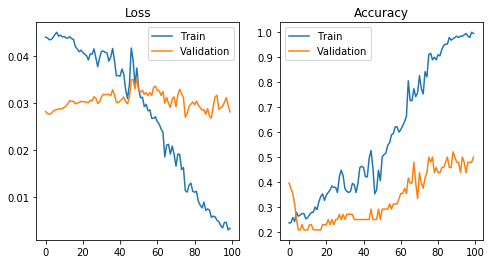

## LSTM

In [8]:
model = LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.39586
	Train loss: 0.04375, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02972, Accuracy: 7/48 (14.58%)
	Test loss: 0.02749, Accuracy: 14/50 (28.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.35565
	Train loss: 0.04371, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02994, Accuracy: 7/48 (14.58%)
	Test loss: 0.02755, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.39953
	Train loss: 0.04366, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02990, Accuracy: 7/48 (14.58%)
	Test loss: 0.02751, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.31206
	Train loss: 0.04344, Accuracy: 57/190 (30.00%)
	Validation loss: 0.02993, Accuracy: 7/48 (14.58%)
	Test loss: 0.02760, Accuracy: 12/50 (24.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.30311
	Train loss: 0.04284, Accuracy: 66/190 (34.74%)
	Validation loss: 0.02968, Accuracy: 8/48 (16.67%)
	Test loss: 0.02775, A

Best validation accuracy:
0.3433

Best test accuracy:
0.40

## Plotting Metrics v/s Number of Epochs: 
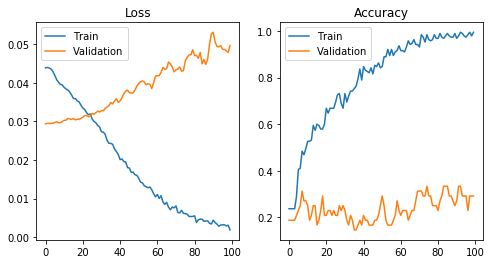

## CNN + LSTM

In [10]:
model = CNN_LSTM().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.40168
	Train loss: 0.04373, Accuracy: 56/190 (29.47%)
	Validation loss: 0.02947, Accuracy: 8/48 (16.67%)
	Test loss: 0.02754, Accuracy: 13/50 (26.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.39550
	Train loss: 0.04371, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02947, Accuracy: 7/48 (14.58%)
	Test loss: 0.02757, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.39319
	Train loss: 0.04369, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02947, Accuracy: 7/48 (14.58%)
	Test loss: 0.02759, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.39201
	Train loss: 0.04366, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02946, Accuracy: 7/48 (14.58%)
	Test loss: 0.02758, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.38840
	Train loss: 0.04355, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02942, Accuracy: 7/48 (14.58%)
	Test loss: 0.02752, A

Best validation accuracy:
0.4175

Best test accuracy:
0.42

## Plotting Metrics v/s Number of Epochs: 
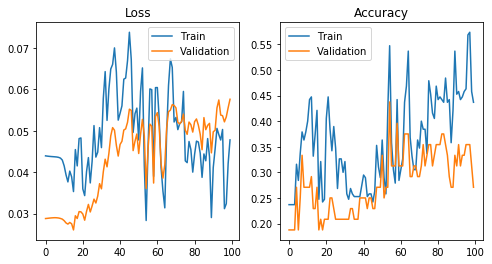


## GRU

In [9]:
model = GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.35987
	Train loss: 0.04380, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02946, Accuracy: 7/48 (14.58%)
	Test loss: 0.02822, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.37982
	Train loss: 0.04336, Accuracy: 55/190 (28.95%)
	Validation loss: 0.02963, Accuracy: 8/48 (16.67%)
	Test loss: 0.02851, Accuracy: 10/50 (20.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.38127
	Train loss: 0.04266, Accuracy: 65/190 (34.21%)
	Validation loss: 0.03027, Accuracy: 8/48 (16.67%)
	Test loss: 0.02847, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.40118
	Train loss: 0.04176, Accuracy: 75/190 (39.47%)
	Validation loss: 0.03072, Accuracy: 8/48 (16.67%)
	Test loss: 0.02839, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.36126
	Train loss: 0.04087, Accuracy: 77/190 (40.53%)
	Validation loss: 0.03052, Accuracy: 9/48 (18.75%)
	Test loss: 0.02839, A

Best validation accuracy:
0.3958333333333333

Best test accuracy:
0.28

## Plotting Metrics v/s Number of Epochs: 
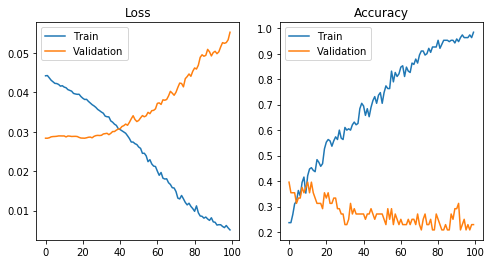

## CNN + GRU

In [11]:
model = CNN_GRU().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)
train_and_evaluate(model, optimizer, data_loaders, num_epochs=EPOCHS)

Training Progress: 	Epoch 1 [0/190 (0.00%)]		Loss: 1.39243
	Train loss: 0.04374, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02918, Accuracy: 7/48 (14.58%)
	Test loss: 0.02814, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 2 [0/190 (0.00%)]		Loss: 1.37991
	Train loss: 0.04368, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02927, Accuracy: 7/48 (14.58%)
	Test loss: 0.02806, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 3 [0/190 (0.00%)]		Loss: 1.38241
	Train loss: 0.04363, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02934, Accuracy: 7/48 (14.58%)
	Test loss: 0.02798, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 4 [0/190 (0.00%)]		Loss: 1.37352
	Train loss: 0.04359, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02938, Accuracy: 7/48 (14.58%)
	Test loss: 0.02790, Accuracy: 11/50 (22.00%)

Training Progress: 	Epoch 5 [0/190 (0.00%)]		Loss: 1.37776
	Train loss: 0.04353, Accuracy: 54/190 (28.42%)
	Validation loss: 0.02941, Accuracy: 7/48 (14.58%)
	Test loss: 0.02786, A

Best validation accuracy:
0.375

Best test accuracy:
0.38

## Plotting Metrics v/s Number of Epochs: 
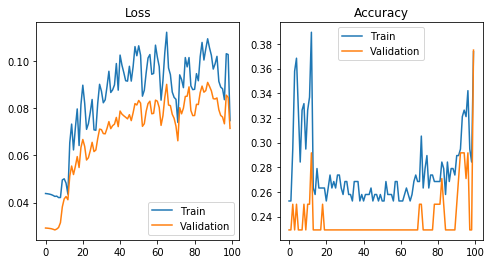